In [133]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
ad = pd.read_excel('advertising_spend_data.xlsx',skiprows=2)
customer = open('customer_service_reps','rb')
customer = pickle.load(customer)
sub = open('subscribers','rb')
sub = pickle.load(sub)
eng = open('engagement','rb')
eng = pickle.load(eng)
customer
#info = pickle.load(f)
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [4]:
#ad

In [5]:
#sub.info()

In [6]:
sub['attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
criteo                        44
appstore                      44
pinterest_organic             30
influencer                    21
playstore                     12
twitter   

In [7]:
sub['account_creation_date']

162502   2020-01-24 21:44:16
380374   2020-03-01 15:44:35
496617   2019-12-07 16:37:06
356799   2020-01-27 16:09:32
681701   2019-10-05 12:57:07
                 ...        
509326   2019-11-17 14:12:33
229587   2019-12-06 18:02:13
281340   2019-12-21 19:40:44
87198    2020-01-17 23:58:51
598241   2019-11-26 19:09:09
Name: account_creation_date, Length: 227628, dtype: datetime64[ns]

# Attribution and allocation

In [8]:
sub['create_yearmonth'] =sub.account_creation_date.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m'))
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,create_yearmonth
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,2020-01
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,2020-03
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2019-12
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,2020-01
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,2019-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,2019-11
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,2019-12
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,2019-12
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,2020-01


In [9]:
#count the number of every channel's last interaction
num_facebook=sub[sub['attribution_technical']=='facebook'].groupby('create_yearmonth').count()['attribution_technical']
num_email =sub[sub['attribution_technical']=='email'].groupby('create_yearmonth').count()['attribution_technical']
num_search=sub[sub['attribution_technical']=='search'].groupby('create_yearmonth').count()['attribution_technical']
num_google=sub[sub['attribution_technical']=='brand sem intent google'].groupby('create_yearmonth').count()['attribution_technical']

num_affiliate=sub[sub['attribution_technical']=='affiliate'].groupby('create_yearmonth').count()['attribution_technical']
num_email_blast =sub[sub['attribution_technical']=='email_blast'].groupby('create_yearmonth').count()['attribution_technical']
num_pinterest=sub[sub['attribution_technical']=='pinterest'].groupby('create_yearmonth').count()['attribution_technical']
num_referral=sub[sub['attribution_technical']=='referral'].groupby('create_yearmonth').count()['attribution_technical']


In [10]:
num_facebook

create_yearmonth
2019-06     1318
2019-07    10011
2019-08     9855
2019-09     6129
2019-10     9489
2019-11    12995
2019-12     9288
2020-01     6289
2020-02     7988
2020-03     6889
Name: attribution_technical, dtype: int64

In [11]:
dic={'num_facebook': list(num_facebook),'num_email':list(num_email),'num_search':list(num_search),'num_google':list(num_google),\
    'num_affiliate':list(num_affiliate),'num_email_blast':list(num_email_blast),'num_pinterest':list(num_pinterest),'num_referral':list(num_referral)}
df=pd.DataFrame(dic)
df

,num_facebook,num_email,num_search,num_google,num_affiliate,num_email_blast,num_pinterest,num_referral
0,1318,309,108,197,78,109,37,22
1,10011,3260,1328,2090,839,1510,793,528
2,9855,3092,1939,1895,1903,1902,637,521
3,6129,2420,1852,1530,1065,1582,517,582
4,9489,2305,2333,1602,760,977,682,529
5,12995,2584,2510,2030,509,629,594,587
6,9288,2677,3770,2443,565,411,851,666
7,6289,2368,4073,2626,1074,35,819,584
8,7988,3168,4300,2346,1480,66,680,583
9,6889,3507,3093,1765,1621,56,455,568


In [12]:
# Calculate CAC
ad['CAC_facebook'] = ad['facebook']/df['num_facebook']
ad['CAC_email'] = ad['email']/df['num_email']
ad['CAC_search'] = ad['search']/df['num_search']
ad['CAC_google'] = ad['brand sem intent google']/df['num_google']
ad['CAC_affiliate'] = ad['affiliate']/df['num_affiliate']
ad['CAC_email_blast'] = ad['email_blast']/df['num_email_blast']
ad['CAC_pinterest'] = ad['pinterest']/df['num_pinterest']
ad['CAC_referral'] = ad['referral']/df['num_referral']


In [13]:
CAC = ad[['CAC_facebook','CAC_email','CAC_search','CAC_google','CAC_affiliate','CAC_email_blast','CAC_pinterest','CAC_referral']]


In [14]:
CAC

,CAC_facebook,CAC_email,CAC_search,CAC_google,CAC_affiliate,CAC_email_blast,CAC_pinterest,CAC_referral
0,64.339909,242.718447,160.185185,108.629442,152.564103,96.330275,159.459459,277.272727
1,5.993407,23.190184,13.027108,10.191388,14.302741,19.735099,7.566204,12.500000
2,5.306951,24.611902,9.334709,11.240106,8.565423,34.647739,9.733124,13.051823
3,7.994779,31.322314,10.205184,13.921569,15.399061,46.586599,11.605416,12.714777
4,5.406260,32.971800,9.001286,13.358302,16.052632,33.060389,9.824047,13.799622
5,4.317045,29.373065,8.525896,10.640394,22.986248,15.580286,10.606061,12.436116
6,5.534022,28.427344,8.514589,9.087188,21.415929,8.515815,8.460635,12.012012
7,7.791382,31.883446,8.249448,8.644326,13.314711,8.571429,8.180708,12.671233
8,6.221833,24.179293,7.000000,9.249787,10.135135,4.545455,9.411765,11.149228
9,7.127304,22.241232,7.339153,12.011331,10.857495,5.357143,12.967033,17.605634


In [15]:
#ad

In [16]:
#sub

In [17]:
sub['revenue'] = sub['discount_price']+sub['join_fee']

In [18]:
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,create_yearmonth,revenue
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,2020-01,NaN
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,2020-03,4.8444
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2019-12,4.6242
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,2020-01,4.5508
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,2019-10,4.5508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,2019-11,4.8444
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,2019-12,4.8444
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,2019-12,4.5508
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,2020-01,NaN


In [19]:
#count the revenue of every channel in each month
re_facebook=sub[sub['attribution_technical']=='facebook'].groupby('create_yearmonth').count()['revenue']
re_email =sub[sub['attribution_technical']=='email'].groupby('create_yearmonth').count()['revenue']
re_search=sub[sub['attribution_technical']=='search'].groupby('create_yearmonth').count()['revenue']
re_google=sub[sub['attribution_technical']=='brand sem intent google'].groupby('create_yearmonth').count()['revenue']

re_affiliate=sub[sub['attribution_technical']=='affiliate'].groupby('create_yearmonth').count()['revenue']
re_email_blast =sub[sub['attribution_technical']=='email_blast'].groupby('create_yearmonth').count()['revenue']
re_pinterest=sub[sub['attribution_technical']=='pinterest'].groupby('create_yearmonth').count()['revenue']
re_referral=sub[sub['attribution_technical']=='referral'].groupby('create_yearmonth').count()['revenue']


In [20]:
re_facebook

create_yearmonth
2019-06    1314
2019-07    9956
2019-08    7955
2019-09    4544
2019-10    7146
2019-11    9556
2019-12    6844
2020-01    4639
2020-02    6071
2020-03    5080
Name: revenue, dtype: int64

In [21]:
dic_re={'re_facebook': list(re_facebook),'re_email':list(re_email),'re_search':list(re_search),'re_google':list(re_google),\
    're_affiliate':list(re_affiliate),'re_email_blast':list(re_email_blast),'re_pinterest':list(re_pinterest),'re_referral':list(re_referral)}
df_revenue=pd.DataFrame(dic_re)
df_revenue



,re_facebook,re_email,re_search,re_google,re_affiliate,re_email_blast,re_pinterest,re_referral
0,1314,308,108,197,78,109,37,22
1,9956,3244,1321,2082,835,1507,790,522
2,7955,2569,1717,1638,1820,1635,604,416
3,4544,1896,1593,1243,945,1306,472,431
4,7146,1830,2016,1295,734,812,632,394
5,9556,1991,2132,1653,475,515,548,440
6,6844,2108,3264,2046,532,334,790,518
7,4639,1909,3513,2236,1002,27,745,425
8,6071,2664,3789,2019,1399,55,632,440
9,5080,2938,2696,1499,1539,51,416,404


In [22]:
df

,num_facebook,num_email,num_search,num_google,num_affiliate,num_email_blast,num_pinterest,num_referral
0,1318,309,108,197,78,109,37,22
1,10011,3260,1328,2090,839,1510,793,528
2,9855,3092,1939,1895,1903,1902,637,521
3,6129,2420,1852,1530,1065,1582,517,582
4,9489,2305,2333,1602,760,977,682,529
5,12995,2584,2510,2030,509,629,594,587
6,9288,2677,3770,2443,565,411,851,666
7,6289,2368,4073,2626,1074,35,819,584
8,7988,3168,4300,2346,1480,66,680,583
9,6889,3507,3093,1765,1621,56,455,568


In [23]:
# Calculate CLV
ad['CLV_facebook'] = (df_revenue['re_facebook']-ad['facebook'])/df['num_facebook']
ad['CLV_email'] = (df_revenue['re_email']- ad['email'])/df['num_email']
ad['CLV_search'] = (df_revenue['re_search']-ad['search'])/df['num_search']
ad['CLV_google'] = (df_revenue['re_google']-ad['brand sem intent google'])/df['num_google']
ad['CLV_affiliate'] = (df_revenue['re_affiliate']-ad['affiliate'])/df['num_affiliate']
ad['CLV_email_blast'] = (df_revenue['re_email_blast']-ad['email_blast'])/df['num_email_blast']
ad['CLV_pinterest'] = (df_revenue['re_pinterest']-ad['pinterest'])/df['num_pinterest']
ad['CLV_referral'] = (df_revenue['re_referral']-ad['referral'])/df['num_referral']


In [24]:
CLV = ad[['CLV_facebook','CLV_email','CLV_search','CLV_google','CLV_affiliate','CLV_email_blast','CLV_pinterest','CLV_referral']]



In [25]:
CLV

,CLV_facebook,CLV_email,CLV_search,CLV_google,CLV_affiliate,CLV_email_blast,CLV_pinterest,CLV_referral
0,-63.342944,-241.721683,-159.185185,-107.629442,-151.564103,-95.330275,-158.459459,-276.272727
1,-4.998901,-22.195092,-12.032380,-9.195215,-13.307509,-18.737086,-6.569987,-11.511364
2,-4.499746,-23.781048,-8.449201,-10.375726,-7.609038,-33.788118,-8.784929,-12.253359
3,-7.253386,-30.538843,-9.345032,-13.109150,-14.511737,-45.761062,-10.692456,-11.974227
4,-4.653177,-32.177874,-8.137162,-12.549938,-15.086842,-32.229273,-8.897361,-13.054820
5,-3.581685,-28.602554,-7.676494,-9.826108,-22.053045,-14.761526,-9.683502,-11.686542
6,-4.797158,-27.639895,-7.648806,-8.249693,-20.474336,-7.703163,-7.532315,-11.234234
7,-7.053745,-31.077280,-7.386938,-7.792841,-12.381750,-7.800000,-7.271062,-11.943493
8,-5.461818,-23.338384,-6.118837,-8.389173,-9.189865,-3.712121,-8.482353,-10.394511
9,-6.389897,-21.403479,-6.467507,-11.162040,-9.908081,-4.446429,-12.052747,-16.894366


In [26]:
ratio=pd.DataFrame()
ratio['facebook']=CLV['CLV_facebook']/CAC['CAC_facebook']
ratio['email']=CLV['CLV_email']/CAC['CAC_email']
ratio['search']=CLV['CLV_search']/CAC['CAC_search']
ratio['google']=CLV['CLV_google']/CAC['CAC_google']
ratio['affiliate']=CLV['CLV_affiliate']/CAC['CAC_affiliate']
ratio['email_blast']=CLV['CLV_email_blast']/CAC['CAC_email_blast']
ratio['pinterest']=CLV['CLV_pinterest']/CAC['CAC_pinterest']
ratio['referral']=CLV['CLV_referral']/CAC['CAC_referral']

In [27]:
ratio

,facebook,email,search,google,affiliate,email_blast,pinterest,referral
0,-0.984505,-0.995893,-0.993757,-0.990794,-0.993445,-0.989619,-0.993729,-0.996393
1,-0.834067,-0.957090,-0.923642,-0.902254,-0.930417,-0.949430,-0.868333,-0.920909
2,-0.847897,-0.966242,-0.905138,-0.923099,-0.888344,-0.975190,-0.902581,-0.938824
3,-0.907265,-0.974987,-0.915714,-0.941643,-0.942378,-0.982280,-0.921333,-0.941757
4,-0.860702,-0.975921,-0.904000,-0.939486,-0.939836,-0.974861,-0.905672,-0.946027
5,-0.829661,-0.973768,-0.900374,-0.923472,-0.959402,-0.947449,-0.913016,-0.939726
6,-0.866848,-0.972300,-0.898318,-0.907838,-0.956033,-0.904571,-0.890278,-0.935250
7,-0.905327,-0.974715,-0.895446,-0.901498,-0.929930,-0.910000,-0.888806,-0.942568
8,-0.877847,-0.965222,-0.874120,-0.906959,-0.906733,-0.816667,-0.901250,-0.932308
9,-0.896538,-0.962333,-0.881233,-0.929292,-0.912557,-0.830000,-0.929492,-0.959600


In [28]:
#CAC > CLV is long-term unsustainable
#Early stage start-ups

In [29]:
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,create_yearmonth,revenue
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,2020-01,NaN
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,2020-03,4.8444
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2019-12,4.6242
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,2020-01,4.5508
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,2019-10,4.5508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,2019-11,4.8444
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,2019-12,4.8444
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,2019-12,4.5508
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,2020-01,NaN


# Customer segmentatiton

In [30]:
df_kmeans = sub[['preferred_genre','weekly_consumption_hour','retarget_TF','age','male_TF','country','plan_type','discount_price','paid_TF']]


In [31]:
df_kmeans

,preferred_genre,weekly_consumption_hour,retarget_TF,age,male_TF,country,plan_type,discount_price,paid_TF
162502,comedy,NaN,False,NaN,False,UAE,base_uae_14_day_trial,4.5141,True
380374,comedy,22.951579,False,70.0,False,UAE,base_uae_14_day_trial,4.5141,False
496617,regional,36.001186,False,25.0,True,UAE,base_uae_14_day_trial,4.5141,False
356799,drama,20.051667,False,30.0,False,UAE,base_uae_14_day_trial,4.5141,False
681701,comedy,22.951579,False,28.0,False,UAE,base_uae_14_day_trial,4.5141,False
...,...,...,...,...,...,...,...,...,...
509326,comedy,28.751405,False,38.0,False,UAE,base_uae_14_day_trial,4.5141,False
229587,comedy,27.301448,True,49.0,False,UAE,base_uae_14_day_trial,4.5141,True
281340,comedy,31.651317,False,45.0,False,UAE,base_uae_14_day_trial,4.5141,False
87198,comedy,NaN,False,NaN,False,UAE,base_uae_14_day_trial,4.5141,True


In [32]:
df_kmeans.fillna(0)

,preferred_genre,weekly_consumption_hour,retarget_TF,age,male_TF,country,plan_type,discount_price,paid_TF
162502,comedy,0.000000,False,0.0,False,UAE,base_uae_14_day_trial,4.5141,True
380374,comedy,22.951579,False,70.0,False,UAE,base_uae_14_day_trial,4.5141,False
496617,regional,36.001186,False,25.0,True,UAE,base_uae_14_day_trial,4.5141,False
356799,drama,20.051667,False,30.0,False,UAE,base_uae_14_day_trial,4.5141,False
681701,comedy,22.951579,False,28.0,False,UAE,base_uae_14_day_trial,4.5141,False
...,...,...,...,...,...,...,...,...,...
509326,comedy,28.751405,False,38.0,False,UAE,base_uae_14_day_trial,4.5141,False
229587,comedy,27.301448,True,49.0,False,UAE,base_uae_14_day_trial,4.5141,True
281340,comedy,31.651317,False,45.0,False,UAE,base_uae_14_day_trial,4.5141,False
87198,comedy,0.000000,False,0.0,False,UAE,base_uae_14_day_trial,4.5141,True


In [33]:
df_kmeans['retarget_TF'] = df_kmeans['retarget_TF'].astype(str)
df_kmeans['retarget_TF'] = df_kmeans['retarget_TF'].map(
                   {"True":1 ,"False":0})

df_kmeans['male_TF'] = df_kmeans['male_TF'].astype(str)
df_kmeans['male_TF'] = df_kmeans['male_TF'].map(
                   {"True":1 ,"False":0})

df_kmeans['paid_TF'] = df_kmeans['paid_TF'].astype(str)
df_kmeans['paid_TF'] = df_kmeans['paid_TF'].map(
                   {"True":1 ,"False":0})

<ipython-input-33-54b66c533b91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['retarget_TF'] = df_kmeans['retarget_TF'].astype(str)
<ipython-input-33-54b66c533b91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['retarget_TF'] = df_kmeans['retarget_TF'].map(
<ipython-input-33-54b66c533b91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [34]:
df_kmeans_na = df_kmeans.dropna()
df_kmeans_na

,preferred_genre,weekly_consumption_hour,retarget_TF,age,male_TF,country,plan_type,discount_price,paid_TF
380374,comedy,22.951579,0,70.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
496617,regional,36.001186,0,25.0,1.0,UAE,base_uae_14_day_trial,4.5141,0
356799,drama,20.051667,0,30.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
681701,comedy,22.951579,0,28.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
284782,comedy,20.051667,0,70.0,0.0,UAE,base_uae_14_day_trial,4.5141,1
...,...,...,...,...,...,...,...,...,...
603751,drama,24.401536,0,43.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
509326,comedy,28.751405,0,38.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
229587,comedy,27.301448,1,49.0,0.0,UAE,base_uae_14_day_trial,4.5141,1
281340,comedy,31.651317,0,45.0,0.0,UAE,base_uae_14_day_trial,4.5141,0


In [35]:
#sum(age<80)
df_na_age = df_kmeans_na[df_kmeans_na['age']<80]
df_na_age

,preferred_genre,weekly_consumption_hour,retarget_TF,age,male_TF,country,plan_type,discount_price,paid_TF
380374,comedy,22.951579,0,70.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
496617,regional,36.001186,0,25.0,1.0,UAE,base_uae_14_day_trial,4.5141,0
356799,drama,20.051667,0,30.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
681701,comedy,22.951579,0,28.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
284782,comedy,20.051667,0,70.0,0.0,UAE,base_uae_14_day_trial,4.5141,1
...,...,...,...,...,...,...,...,...,...
603751,drama,24.401536,0,43.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
509326,comedy,28.751405,0,38.0,0.0,UAE,base_uae_14_day_trial,4.5141,0
229587,comedy,27.301448,1,49.0,0.0,UAE,base_uae_14_day_trial,4.5141,1
281340,comedy,31.651317,0,45.0,0.0,UAE,base_uae_14_day_trial,4.5141,0


In [36]:
#Standarize the feature of age and weekly_consumption_hour
df_na_age['age'] = (df_na_age['age']-min(df_na_age['age']))/(max(df_na_age['age'])-min(df_na_age['age']))
df_na_age['weekly_consumption_hour'] = (df_na_age['weekly_consumption_hour']-min(df_na_age['weekly_consumption_hour']))/(max(df_na_age['weekly_consumption_hour'])-min(df_na_age['weekly_consumption_hour']))



<ipython-input-36-394dafdeb2b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_age['age'] = (df_na_age['age']-min(df_na_age['age']))/(max(df_na_age['age'])-min(df_na_age['age']))
<ipython-input-36-394dafdeb2b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_age['weekly_consumption_hour'] = (df_na_age['weekly_consumption_hour']-min(df_na_age['weekly_consumption_hour']))/(max(df_na_age['weekly_consumption_hour'])-min(df_na_age['weekly_consumption_hour']))


In [37]:
df_na_age

,preferred_genre,weekly_consumption_hour,retarget_TF,age,male_TF,country,plan_type,discount_price,paid_TF
380374,comedy,0.506667,0,0.886076,0.0,UAE,base_uae_14_day_trial,4.5141,0
496617,regional,0.626667,0,0.316456,1.0,UAE,base_uae_14_day_trial,4.5141,0
356799,drama,0.480000,0,0.379747,0.0,UAE,base_uae_14_day_trial,4.5141,0
681701,comedy,0.506667,0,0.354430,0.0,UAE,base_uae_14_day_trial,4.5141,0
284782,comedy,0.480000,0,0.886076,0.0,UAE,base_uae_14_day_trial,4.5141,1
...,...,...,...,...,...,...,...,...,...
603751,drama,0.520000,0,0.544304,0.0,UAE,base_uae_14_day_trial,4.5141,0
509326,comedy,0.560000,0,0.481013,0.0,UAE,base_uae_14_day_trial,4.5141,0
229587,comedy,0.546667,1,0.620253,0.0,UAE,base_uae_14_day_trial,4.5141,1
281340,comedy,0.586667,0,0.569620,0.0,UAE,base_uae_14_day_trial,4.5141,0


In [38]:
df_kmeans_dummy = pd.get_dummies(df_na_age)

In [39]:
df_kmeans_dummy

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,paid_TF,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
380374,0.506667,0,0.886076,0.0,4.5141,0,1,0,0,0,0,1,0,1,0,0,0,0
496617,0.626667,0,0.316456,1.0,4.5141,0,0,0,0,0,1,1,0,1,0,0,0,0
356799,0.480000,0,0.379747,0.0,4.5141,0,0,1,0,0,0,1,0,1,0,0,0,0
681701,0.506667,0,0.354430,0.0,4.5141,0,1,0,0,0,0,1,0,1,0,0,0,0
284782,0.480000,0,0.886076,0.0,4.5141,1,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603751,0.520000,0,0.544304,0.0,4.5141,0,0,1,0,0,0,1,0,1,0,0,0,0
509326,0.560000,0,0.481013,0.0,4.5141,0,1,0,0,0,0,1,0,1,0,0,0,0
229587,0.546667,1,0.620253,0.0,4.5141,1,1,0,0,0,0,1,0,1,0,0,0,0
281340,0.586667,0,0.569620,0.0,4.5141,0,1,0,0,0,0,1,0,1,0,0,0,0


In [40]:
#df_kmeans_dummy.fillna(0)

In [41]:
df_kmeans_dummy.describe()

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,paid_TF,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
count,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.0,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000
mean,0.553655,0.032662,0.581193,0.137378,4.515130,0.269252,0.627746,0.254563,0.038919,0.024360,0.054412,1.0,0.000045,0.997800,0.000013,0.000032,0.002084,0.000026
std,0.046056,0.177750,0.176695,0.344247,0.023806,0.443572,0.483407,0.435617,0.193402,0.154165,0.226830,0.0,0.006740,0.046857,0.003603,0.005697,0.045598,0.005095
min,0.000000,0.000000,0.000000,0.000000,3.780100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.520000,0.000000,0.443038,0.000000,4.514100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546667,0.000000,0.582278,0.000000,4.514100,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.573333,0.000000,0.721519,0.000000,4.514100,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,5.027900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#Delete abnormal data
#age=df_kmeans_dummy['age']

In [43]:
#age

In [44]:
df_kmeans_dummy['weekly_consumption_hour'].value_counts()

0.533333    20865
0.560000    18536
0.546667    18178
0.520000    16147
0.573333    14937
            ...  
0.544472        1
0.495678        1
0.293333        1
0.500877        1
0.000000        1
Name: weekly_consumption_hour, Length: 78, dtype: int64

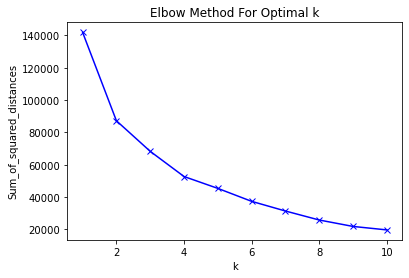

In [45]:
# Generate elbow-method diagram

#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,11)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(df_kmeans_dummy)

In [46]:
# From the above figure, the optimal number of clusters is about k=3.

In [47]:
kmeans4 = KMeans(n_clusters=4, random_state=666, max_iter=1000,init='k-means++').fit(df_kmeans_dummy)
print(kmeans4.cluster_centers_)

[[ 5.49051107e-01  3.27020524e-02  5.57815106e-01  8.81866692e-02
   4.51502935e+00 -1.07691633e-14  1.00000000e+00 -1.13242749e-14
   1.38777878e-15 -4.05925293e-16  5.21804822e-15  1.00000000e+00
   1.34410409e-05  9.98010726e-01  1.34410409e-05  4.03231226e-05
   1.88174572e-03  4.03231226e-05]
 [ 5.59552908e-01  3.45245974e-02  5.70041915e-01  1.74608427e-01
   4.51496224e+00  3.99073461e-01 -6.32827124e-15 -9.04831765e-15
   3.30686080e-01  2.06982131e-01  4.62331789e-01  1.00000000e+00
   5.51511141e-05  9.98235164e-01  5.21772296e-19  4.74338450e-20
   1.70968454e-03  1.04354459e-18]
 [ 5.58701162e-01  3.46867437e-02  6.02773325e-01  2.01801560e-01
   4.51576115e+00  1.00000000e+00  1.00000000e+00 -9.54791801e-15
   1.65839564e-15 -3.74700271e-16 -1.11022302e-15  1.00000000e+00
   1.79259658e-04  9.96235547e-01  4.48149144e-05  4.48149144e-05
   3.45074841e-03  4.48149144e-05]
 [ 5.56791532e-01  3.05719167e-02  6.18417684e-01  1.76827558e-01
   4.51503764e+00  3.04240292e-01  3.

In [124]:
X = df_kmeans_dummy

kmeans = KMeans(n_clusters=5)
res = kmeans.fit(X)

y = res.predict(X)
y = y.tolist()
df_kmeans_dummy['group'] = y

In [128]:
#According to the elbow graph, I divide the data into 4 group
for i in range(4):
    df_num = i + 1
    locals()['df_group'+str(df_num)] = df_kmeans_dummy[df_kmeans_dummy['group'] == i]

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='age', ylabel='Density'>

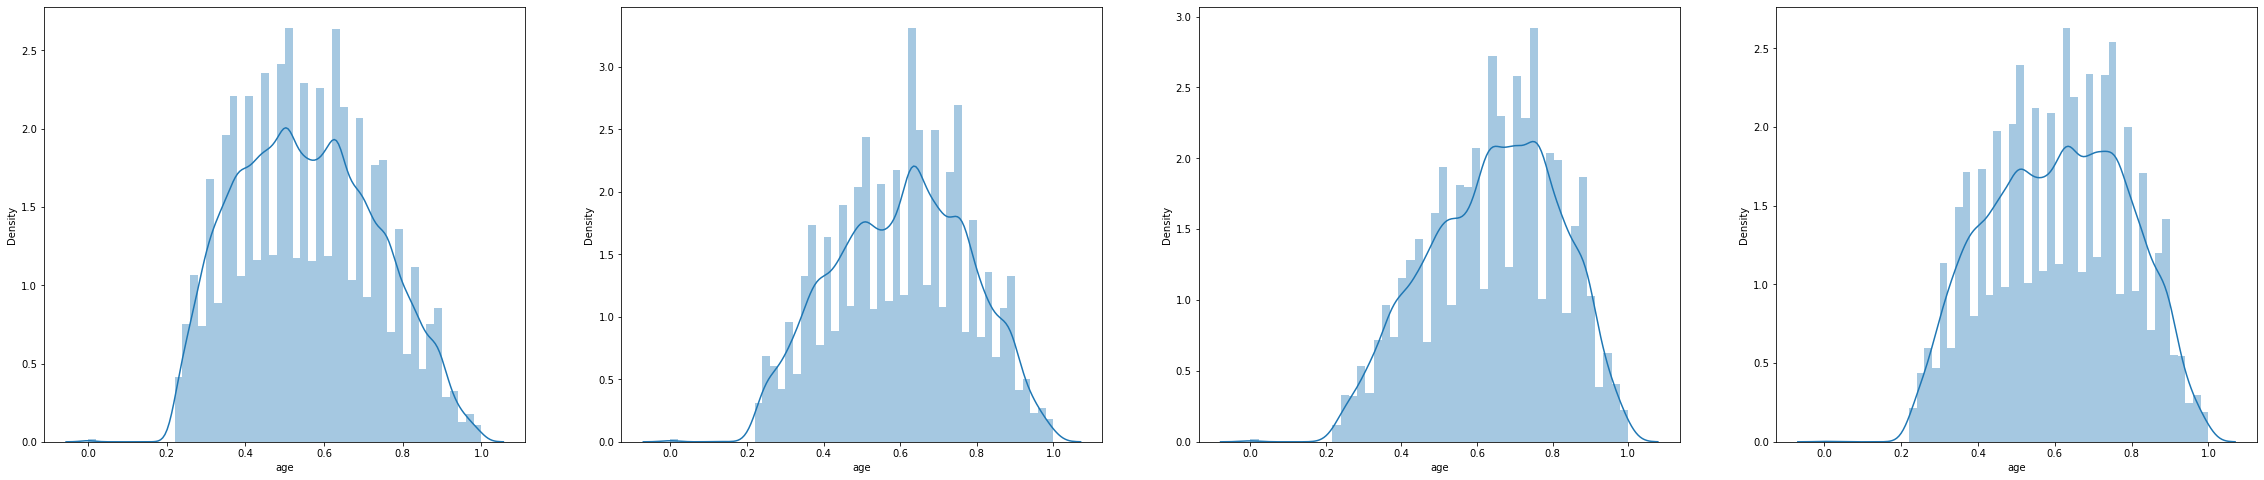

In [135]:
plt.figure(figsize=(50,8))

plt.subplot(1,5,1)
sns.distplot(df_group1['age'])
#plt.show()

plt.subplot(1,5,2)
sns.distplot(df_group2['age'])
#plt.show()

plt.subplot(1,5,3)
sns.distplot(df_group3['age'])
#plt.show()

plt.subplot(1,5,4)
sns.distplot(df_group4['age'])
#plt.show()


In [137]:
df_group1.to_csv('group1.csv')
df_group2.to_csv('group2.csv')
df_group3.to_csv('group3.csv')
df_group4.to_csv('group4.csv')

In [131]:
df_group2.describe()

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,paid_TF,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,group
count,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.0,22314.0,22314.0,22314.0,22314.0,22314.0,22314.0,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.0
mean,0.558701,0.034687,0.602773,0.201802,4.515761,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000179,0.996236,0.000045,0.000045,0.003451,0.000045,1.0
std,0.048109,0.182989,0.175248,0.401354,0.030944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013388,0.061241,0.006694,0.006694,0.058643,0.006694,0.0
min,0.186667,0.000000,0.000000,0.000000,3.780100,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.520000,0.000000,0.468354,0.000000,4.514100,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.546667,0.000000,0.620253,0.000000,4.514100,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.586667,0.000000,0.734177,0.000000,4.514100,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,0.920000,1.000000,1.000000,1.000000,5.027900,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# Churn

In [48]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import copy
import math


In [49]:
customer

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [50]:
customer['current_sub_TF'] = customer['current_sub_TF'].astype(str)
customer['churn'] = customer['current_sub_TF'].map(
                   {"True":0 ,"False":1})

In [51]:
customer

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,churn
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN,1
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN,1
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN,1
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN,1
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN,1
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN,1
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN,1
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN,1


In [52]:
customer['churn'].value_counts()

1    1390355
0     818288
Name: churn, dtype: int64

In [53]:
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,create_yearmonth,revenue
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,2020-01,NaN
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,2020-03,4.8444
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2019-12,4.6242
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,2020-01,4.5508
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,2019-10,4.5508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,2019-11,4.8444
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,2019-12,4.8444
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,2019-12,4.5508
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,2020-01,NaN


In [54]:
df_whole = pd.merge(sub,customer,on=['subid'],how='left')

In [55]:
df_whole

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,churn
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-07 16:37:06,14.0,False,OTT,0.0000,0.0,2019-12-07 17:34:29,NaT,False,1.0
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302467,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-06 18:02:13,14.0,True,OTT,4.5875,0.0,2019-12-06 19:05:16,2019-12-21 10:05:18,True,1.0
302468,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-06 18:02:13,14.0,True,OTT,4.5875,1.0,2019-12-21 10:05:18,NaT,False,1.0
302469,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
302470,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [56]:
df_churn = df_whole.dropna(subset=['churn'])

In [57]:
df_churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,churn
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-07 16:37:06,14.0,False,OTT,0.0000,0.0,2019-12-07 17:34:29,NaT,False,1.0
6,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,2020-02-19 18:30:15,14.0,True,OTT,4.5875,0.0,2020-02-19 19:45:46,2020-03-05 13:52:53,True,0.0
7,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,2020-02-19 18:30:15,14.0,True,OTT,4.5875,1.0,2020-03-05 13:52:53,NaT,False,0.0
8,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,2020-03-05 14:52:22,14.0,True,OTT,3.4498,0.0,2020-03-05 14:52:22,2020-03-20 13:54:48,True,0.0
9,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,2020-03-05 14:52:22,14.0,True,OTT,3.4498,1.0,2020-03-20 13:54:48,NaT,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302464,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,...,2020-03-06 02:57:03,14.0,False,OTT,0.0000,0.0,2020-03-06 06:37:50,NaT,False,1.0
302465,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,2020-01-01 22:43:56,14.0,False,OTT,0.0000,0.0,2020-01-01 22:43:56,NaT,False,1.0
302466,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-11-17 14:12:33,14.0,False,OTT,0.0000,0.0,2019-11-17 15:05:20,NaT,False,1.0
302467,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-06 18:02:13,14.0,True,OTT,4.5875,0.0,2019-12-06 19:05:16,2019-12-21 10:05:18,True,1.0


In [58]:
df_churn.isna().sum()

subid                                0
package_type                     43967
num_weekly_services_utilized     87792
preferred_genre                  44362
intended_use                      3240
weekly_consumption_hour          53015
num_ideal_streaming_services     89770
retarget_TF                          0
age                              50832
male_TF                              0
country                              0
attribution_technical                0
attribution_survey                2580
op_sys                               6
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date_x              0
creation_until_cancel_days      113537
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      50832
join_fee                         50832
language                 

In [59]:
#Since there is no data between 1 and 18, I decide to delete the age which is out of (18,80)
age_filter = (df_churn['age']<80)&(df_churn['age']>18)
df_churn_filter = df_churn[age_filter]

In [60]:
#app_opens = eng.groupby('subid').count()['app_opens']
#app_opens
#re_facebook=sub[sub['attribution_technical']=='facebook'].groupby('create_yearmonth').count()['revenue']

subid
20000062     4
20000405     4
20000604    15
20000685    38
20000741     2
            ..
29999740    14
29999820    10
29999822     5
29999889    76
29999945    37
Name: app_opens, Length: 135019, dtype: int64

In [61]:
list_feature = ['app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']
eng1 = eng.groupby('subid').sum()[list_feature]
eng1


,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,
20000062,4.0,3.0,6.0,23.0,0.0,1.0
20000405,5.0,4.0,13.0,17.0,0.0,1.0
20000604,14.0,5.0,8.0,68.0,0.0,1.0
20000685,46.0,10.0,14.0,165.0,0.0,8.0
20000741,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...
29999740,15.0,3.0,11.0,31.0,0.0,0.0
29999820,12.0,6.0,22.0,50.0,0.0,7.0
29999822,5.0,4.0,2.0,25.0,0.0,1.0


In [85]:
eng2 = eng.groupby('subid').max()['payment_period']
#eng2.value_counts()
#eng2
eng_pay=pd.DataFrame({"payment_period":eng2}).reset_index()
#eng_pay
df_eng = pd.merge(eng1,eng_pay,on=['subid'],how='outer')
#df_eng
df_churn_final = pd.merge(df_churn_filter,df_eng,on=['subid'],how='outer')
df_churn_final

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,...,payment_period_x,last_payment,next_payment,renew,churn,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,...,0.0,2019-12-07 17:34:29,NaT,False,1.0,2.0,2.0,13.0,13.0,0.0,1.0,0.0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,...,0.0,2020-02-19 19:45:46,2020-03-05 13:52:53,True,0.0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,...,1.0,2020-03-05 13:52:53,NaT,False,0.0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,...,0.0,2020-03-05 14:52:22,2020-03-20 13:54:48,True,0.0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,...,1.0,2020-03-20 13:54:48,NaT,False,0.0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181292,29998599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,268.0,18.0,303.0,326.0,0.0,56.0,2.0
181293,29999005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,131.0,10.0,321.0,395.0,0.0,75.0,2.0
181294,29999052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,4.0,2.0,2.0,33.0,0.0,0.0,1.0
181295,29999206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,280.0,15.0,205.0,206.0,1.0,45.0,1.0


In [84]:
df_churn_final

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,...,payment_period_x,last_payment,next_payment,renew,churn,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,...,0.0,2019-12-07 17:34:29,NaT,False,1.0,2.0,2.0,13.0,13.0,0.0,1.0,0.0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,...,0.0,2020-02-19 19:45:46,2020-03-05 13:52:53,True,0.0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,...,1.0,2020-03-05 13:52:53,NaT,False,0.0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,...,0.0,2020-03-05 14:52:22,2020-03-20 13:54:48,True,0.0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,...,1.0,2020-03-20 13:54:48,NaT,False,0.0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209889,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,...,0.0,2020-03-06 06:37:50,NaT,False,1.0,1.0,2.0,0.0,6.0,0.0,0.0,0.0
209890,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,...,0.0,2020-01-01 22:43:56,NaT,False,1.0,31.0,5.0,47.0,59.0,0.0,8.0,0.0
209891,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,...,0.0,2019-11-17 15:05:20,NaT,False,1.0,16.0,3.0,20.0,36.0,0.0,2.0,0.0
209892,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,...,0.0,2019-12-06 19:05:16,2019-12-21 10:05:18,True,1.0,72.0,15.0,39.0,122.0,0.0,15.0,1.0


In [86]:
df_churn_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181297 entries, 0 to 181296
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   subid                            181297 non-null  int64         
 1   package_type                     113700 non-null  object        
 2   num_weekly_services_utilized     120868 non-null  float64       
 3   preferred_genre                  113316 non-null  object        
 4   intended_use                     154065 non-null  object        
 5   weekly_consumption_hour          155097 non-null  float64       
 6   num_ideal_streaming_services     118909 non-null  float64       
 7   retarget_TF                      157250 non-null  object        
 8   age                              157250 non-null  float64       
 9   male_TF                          157250 non-null  object        
 10  country                          157250 non-

In [88]:
df_churn_model = df_churn_final[['preferred_genre','weekly_consumption_hour','age','male_TF','app_opens',\
                                  'cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds',\
                                  'num_videos_rated','num_series_started','payment_period_y','churn']]
df_churn_model


,preferred_genre,weekly_consumption_hour,age,male_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn
0,regional,36.001186,25.0,True,2.0,2.0,13.0,13.0,0.0,1.0,0.0,1.0
1,comedy,20.051667,61.0,False,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
2,comedy,20.051667,61.0,False,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
3,drama,34.551230,23.0,False,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
4,drama,34.551230,23.0,False,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181292,NaN,NaN,NaN,NaN,268.0,18.0,303.0,326.0,0.0,56.0,2.0,NaN
181293,NaN,NaN,NaN,NaN,131.0,10.0,321.0,395.0,0.0,75.0,2.0,NaN
181294,NaN,NaN,NaN,NaN,4.0,2.0,2.0,33.0,0.0,0.0,1.0,NaN
181295,NaN,NaN,NaN,NaN,280.0,15.0,205.0,206.0,1.0,45.0,1.0,NaN


In [103]:
#df_churn_model.isna().sum()
df_churn_model_na = df_churn_model.dropna()
df_churn_model_na

,preferred_genre,weekly_consumption_hour,age,male_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn
0,regional,36.001186,25.0,True,2.0,2.0,13.0,13.0,0.0,1.0,0.0,1.0
1,comedy,20.051667,61.0,False,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
2,comedy,20.051667,61.0,False,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
3,drama,34.551230,23.0,False,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
4,drama,34.551230,23.0,False,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
157245,comedy,28.751405,61.0,False,1.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0
157246,drama,24.401536,43.0,False,31.0,5.0,47.0,59.0,0.0,8.0,0.0,1.0
157247,comedy,28.751405,38.0,False,16.0,3.0,20.0,36.0,0.0,2.0,0.0,1.0
157248,comedy,27.301448,49.0,False,72.0,15.0,39.0,122.0,0.0,15.0,1.0,1.0


In [104]:
df_churn_model_na['male_TF'] = df_churn_model_na['male_TF'].astype(str)
df_churn_model_na['male_TF'] = df_churn_model_na['male_TF'].map(
                   {"True":1 ,"False":0})
df_churn_model_na_dummy = pd.get_dummies(df_churn_model_na)
df_churn_f = df_churn_model_na_dummy.rename(columns={'churn':'churn_TF'})
df_churn_f


<ipython-input-104-767010697c02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_model_na['male_TF'] = df_churn_model_na['male_TF'].astype(str)
<ipython-input-104-767010697c02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_model_na['male_TF'] = df_churn_model_na['male_TF'].map(


,weekly_consumption_hour,age,male_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn_TF,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
0,36.001186,25.0,1,2.0,2.0,13.0,13.0,0.0,1.0,0.0,1.0,0,0,0,0,1
1,20.051667,61.0,0,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0,1,0,0,0,0
2,20.051667,61.0,0,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0,1,0,0,0,0
3,34.551230,23.0,0,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0,0,1,0,0,0
4,34.551230,23.0,0,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157245,28.751405,61.0,0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0,1,0,0,0,0
157246,24.401536,43.0,0,31.0,5.0,47.0,59.0,0.0,8.0,0.0,1.0,0,1,0,0,0
157247,28.751405,38.0,0,16.0,3.0,20.0,36.0,0.0,2.0,0.0,1.0,1,0,0,0,0
157248,27.301448,49.0,0,72.0,15.0,39.0,122.0,0.0,15.0,1.0,1.0,1,0,0,0,0


In [69]:
pd.options.display.max_columns = 25

In [70]:
#Define the function
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives


In [107]:
df_churn_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113024 entries, 0 to 157249
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   weekly_consumption_hour          113024 non-null  float64
 1   age                              113024 non-null  float64
 2   male_TF                          113024 non-null  int64  
 3   app_opens                        113024 non-null  float64
 4   cust_service_mssgs               113024 non-null  float64
 5   num_videos_completed             113024 non-null  float64
 6   num_videos_more_than_30_seconds  113024 non-null  float64
 7   num_videos_rated                 113024 non-null  float64
 8   num_series_started               113024 non-null  float64
 9   payment_period_y                 113024 non-null  float64
 10  churn_TF                         113024 non-null  float64
 11  preferred_genre_comedy           113024 non-null  uint8  
 12  pr

In [108]:
# Split train，test dataset
df_train, df_test = model_selection.train_test_split(df_churn_f, test_size=0.3)

#FIT CHURN MODEL 
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['weekly_consumption_hour','age','male_TF','app_opens','preferred_genre_comedy','preferred_genre_drama',\
            'cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','preferred_genre_international',\
            'preferred_genre_other','preferred_genre_regional','num_videos_rated','num_series_started','payment_period_y'] # list of x covariates

add_constant_TF = True

#preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)


In [109]:
# fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())



RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     5585.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:02:00   Log-Likelihood:                -23287.
No. Observations:               79116   AIC:                         4.660e+04
Df Residuals:                   79101   BIC:                         4.674e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [110]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.333048
         Iterations 7

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                79116
Model:                          Logit   Df Residuals:                    79101
Method:                           MLE   Df Model:                           14
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.4543
Time:                        16:02:15   Log-Likelihood:                -26349.
converged:                       True   LL-Null:                       -48287.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
weekly_consumption_hour          

In [113]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

IndexError: list index out of range

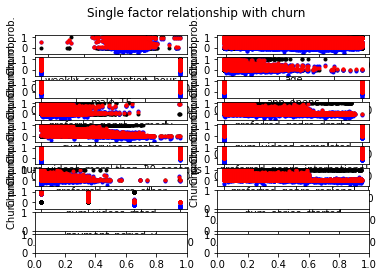

In [121]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 10
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

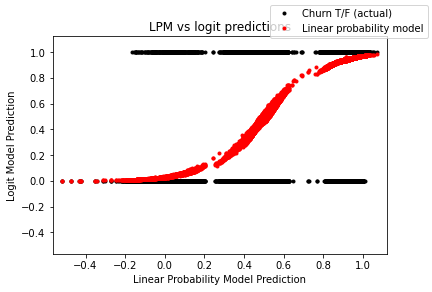

In [115]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

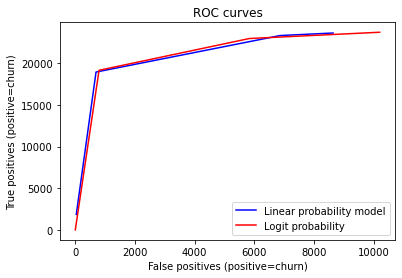

In [116]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [117]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.6
base_price = 10
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [118]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)


In [119]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind


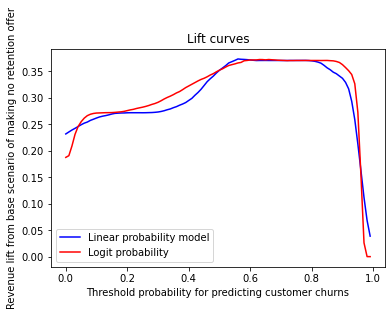

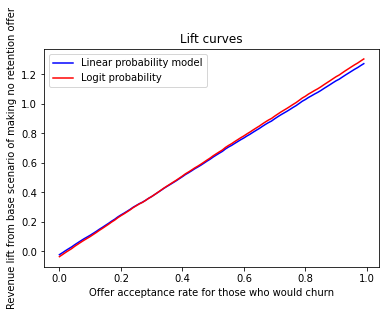

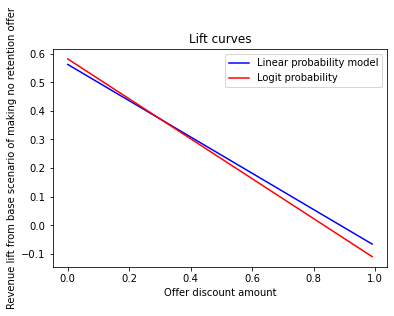

In [120]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])